In [ ]:
import os
for i in os.listdir('./african-wildlife'):
    print('./african-wildlife/' + i)

./african-wildlife/buffalo
./african-wildlife/elephant
./african-wildlife/rhino
./african-wildlife/zebra


Libraries :
 As this is a deep learning task we surely need any deep learning library to start work with . 
 
 In Python we have 2 very famous libraries -   
 1. Tensorflow
 2. Pytorch
 
 For this project we are proceeding with tensorflow.
 
 We also need some supporting libraries which will help us wrangle the data and produce the dataframes and others.
 
 At last but not the least we are importing some libraries to make confusion matrix as this is a problem of multiclass classifiation.

In [ ]:
import sys
print(sys.executable)

c:\Users\Legion\Desktop\Luka Programming\.venv\Scripts\python.exe


In [ ]:
# for data processing

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import pandas as pd
import re
import glob
import cv2

# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import*
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.image as mpimg

# for prediction (machine learning models) ------------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*
import xgboost as xgb

#deep learning libraries

import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

# for confusion matrix plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

2.19.0


Show 3 examples of buffalos

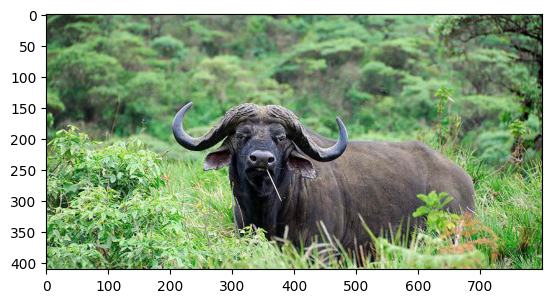

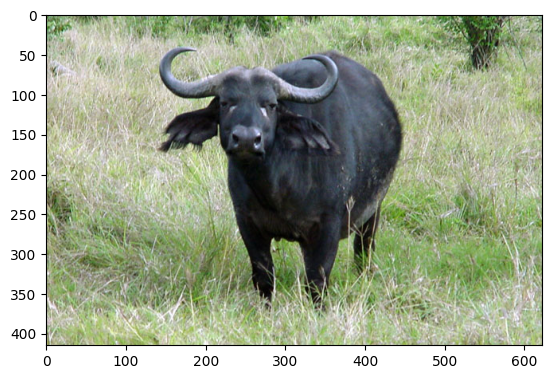

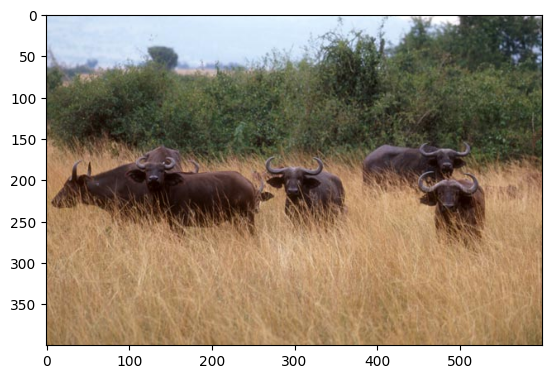

In [ ]:
k=0
for i in os.listdir('./african-wildlife/buffalo/'):
  if i[-3:] !='txt':
    img=mpimg.imread('./african-wildlife/buffalo/'+i)
    plt.imshow(img)
    plt.show()
    k+=1
  if k==3:
    break

We resize and store buffalo images in data frames

In [ ]:
df = []
label = []
for i in os.listdir('./african-wildlife/buffalo/'):
    if i[-3:] != 'txt':
        img = mpimg.imread('./african-wildlife/buffalo/' + i)
        img = resize(img, (128, 128), anti_aliasing=True)
        tensor = img.reshape(49152)  # 128x128x3 = 49152
        df.append(tensor)
        
for i in range(len(df)):
    label.append(0) #label for buffalo is 0
    
df = pd.DataFrame(df)
label = pd.DataFrame({'label': label})
data = pd.concat([label, df], axis=1)


X = data.drop(columns='label')  

y = data['label']
xtr1, xts1, ytr1, yts1 = train_test_split(X, y, test_size=0.2, random_state=0) #20% test size  300 training / 76 testing

In [ ]:
# Initialize lists
df = []
label = []

# Load and process elephant images
for filename in os.listdir('./african-wildlife/elephant/'):
    if not filename.endswith('.txt'):
        img = mpimg.imread(f'./african-wildlife/elephant/{filename}')
        img = resize(img, (128, 128), anti_aliasing=True)
        tensor = img.reshape(49152)  # 128x128x3 = 49152
        df.append(tensor)

# Create labels (optimized)
label = [1] * len(df)

# Convert to DataFrames and combine
data = pd.concat([
    pd.DataFrame({'label': label}),
    pd.DataFrame(df)
], axis=1)

# Modern column dropping
X = data.drop(columns='label')
y = data['label']

# Train-test split
xtr2, xts2, ytr2, yts2 = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Initialize lists
df = []
label = []

# Load and process rhino images
for filename in os.listdir('./african-wildlife/rhino/'):
    if not filename.endswith('.txt'):
        img = mpimg.imread(f'./african-wildlife/rhino/{filename}')
        img = resize(img, (128, 128), anti_aliasing=True)
        df.append(img.reshape(49152))  # Direct reshape without temp variable

# Create labels (optimized)
label = [2] * len(df)  # More efficient than appending in loop

# Convert to DataFrames and combine
data = pd.concat([
    pd.DataFrame({'label': label}),
    pd.DataFrame(df)
], axis=1)

# Modern column dropping syntax
X = data.drop(columns='label')  # Preferred way
y = data['label']

# Train-test split
xtr3, xts3, ytr3, yts3 = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Initialize lists
df = []
label = []

# Load and process zebra images
for filename in os.listdir('./african-wildlife/zebra/'):
    if not filename.endswith('.txt'):
        # Read and process image in one line
        img = resize(mpimg.imread(f'./african-wildlife/zebra/{filename}'), 
                    (128, 128), 
                    anti_aliasing=True)
        df.append(img.reshape(49152))  # Direct reshape and append

# Create labels (optimized list creation)
label = [3] * len(df)  # More efficient than appending in loop

# Convert to DataFrames and combine
data = pd.concat([
    pd.DataFrame({'label': label}),
    pd.DataFrame(df)
], axis=1)

# Modern pandas syntax for dropping columns
X = data.drop(columns='label')  # Preferred way
y = data['label']

# Train-test split (same random_state for reproducibility)
xtr4, xts4, ytr4, yts4 = train_test_split(X, y, test_size=0.2, random_state=0)

Adding all the datasets together

In [ ]:
X_train=pd.concat([xtr1,xtr2,xtr3,xtr4],axis=0)

In [ ]:
y_train=pd.concat([ytr1,ytr2,ytr3,ytr4],axis=0)


In [ ]:
X_test=pd.concat([xts1,xts2,xts3,xts4],axis=0)


In [ ]:
y_test=pd.concat([yts1,yts2,yts3,yts4],axis=0)


In [ ]:
# Shuffle and recombine datasets
train = pd.concat([X_train, y_train], axis=1).sample(frac=1, random_state=0)
test = pd.concat([X_test, y_test], axis=1).sample(frac=1, random_state=0)

# Splitting Back to Features/Labels
X_train = train.drop(columns='label') 
y_train = train['label']
X_test = test.drop(columns='label')
y_test = test['label']

Convert dataframes to numpy

In [ ]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

Change the shapes of arrays

In [ ]:
X_train=X_train.reshape(1200,128,128,3)
X_test=X_test.reshape(304,128,128,3)

In [ ]:
decoder=['buffalo','elephant','rhino','zebra']

Convert labels to integers

In [ ]:
y_train=y_train.astype('int64')
y_test=y_test.astype('int64')

4 example images of buffalos

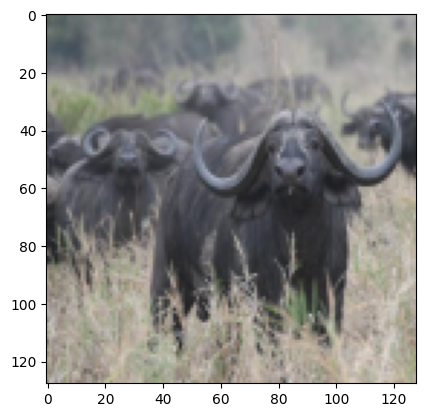

buffalo


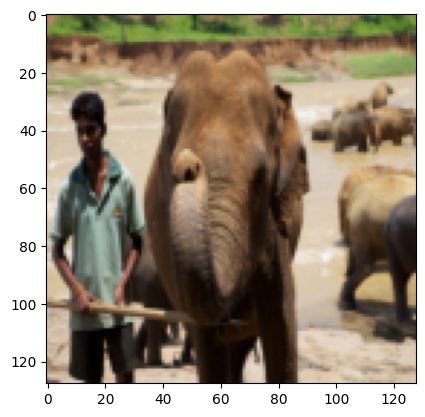

elephant


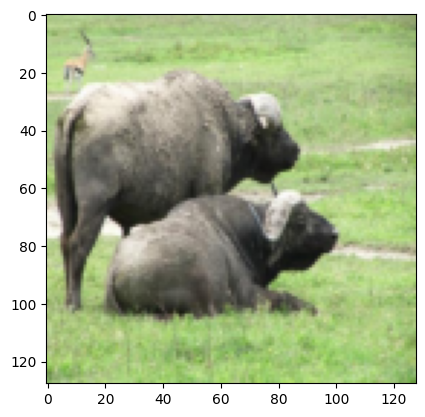

buffalo


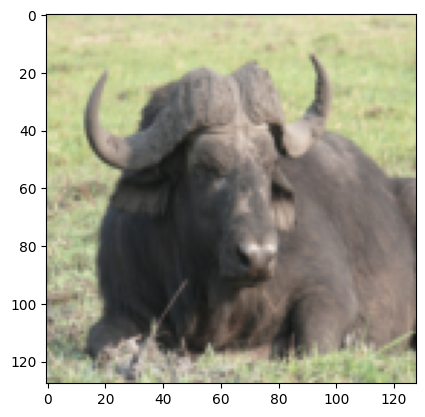

buffalo


In [ ]:
for i in range(4):
  plt.imshow(X_train[i])
  plt.show()
  print(decoder[y_train[i]])

In [ ]:
y_train=y_train.reshape(1200,1)
y_tets=y_test.reshape(304,1)

Here I define the architecture for the CNN

In [ ]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

c:\Users\Legion\Desktop\Luka Programming\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 126, 126, 64)   │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 126, 126, 64)   │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1016064)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │   130,056,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,066,948 (496.17 MB)

 Trainable params: 130,066,948 (496.17 MB)

 Non-trainable params: 0 (0.00 B)

Here I define how the model will learn and how will its performance be measured

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


Here I train the CNN model using the prepared image data

In [ ]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(X_test,y_test))
#I set batch_size=20, meaning the model processes 20 images at a time before updating its weights. This balances learning stability and training speed
#I trained for 10 epochs, which means the model sees the entire training dataset 10 times. 

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9433 - loss: 0.1603 - val_accuracy: 0.5724 - val_loss: 1.7962
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9923 - loss: 0.0312 - val_accuracy: 0.5691 - val_loss: 1.8811
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9966 - loss: 0.0223 - val_accuracy: 0.5296 - val_loss: 2.5797
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.5395 - val_loss: 2.5279
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9974 - loss: 0.0084 - val_accuracy: 0.5395 - val_loss: 2.6152
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9999 - loss: 0.0039 - val_accuracy: 0.5493 - val_loss: 2.9709
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9989 - loss: 0.0069 - val_accuracy: 0.5230 - val_loss: 2.1505
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9501 - loss: 0.1208 - val_accuracy: 0.5329 - val_loss:

Data visualization

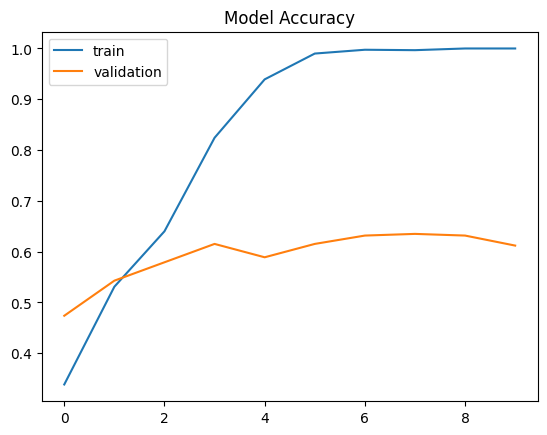

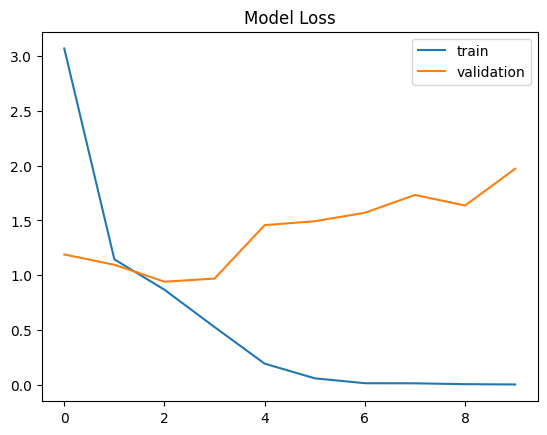

In [ ]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

Here I try with the kernel of 4X4

In [ ]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(4,4),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 125, 125, 64)   │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 125, 125, 64)   │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1000000)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │   128,000,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,012,100 (488.33 MB)

 Trainable params: 128,012,100 (488.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 125, 125, 64)   │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 125, 125, 64)   │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1000000)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │   128,000,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,012,100 (488.33 MB)

 Trainable params: 128,012,100 (488.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(X_test,y_test))


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.2781 - loss: 6.5759 - val_accuracy: 0.5033 - val_loss: 1.1867
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.4992 - loss: 1.1170 - val_accuracy: 0.5296 - val_loss: 1.0577
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.6226 - loss: 0.9325 - val_accuracy: 0.5625 - val_loss: 0.9715
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.7132 - loss: 0.7054 - val_accuracy: 0.5329 - val_loss: 1.0530
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.8524 - loss: 0.4217 - val_accuracy: 0.6118 - val_loss: 0.9588
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9691 - loss: 0.1403 - val_accuracy: 0.5921 - val_loss: 1.2660
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9938 - loss: 0.0589 - val_accuracy: 0.6020 - val_loss: 1.5733
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9938 - loss: 0.0296 - val_accuracy: 0.5724 - val_loss:

Data visualization

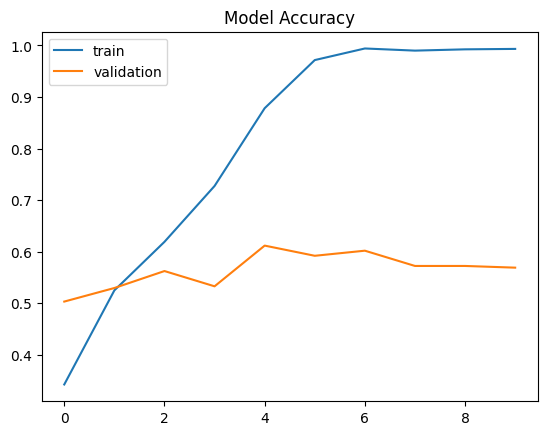

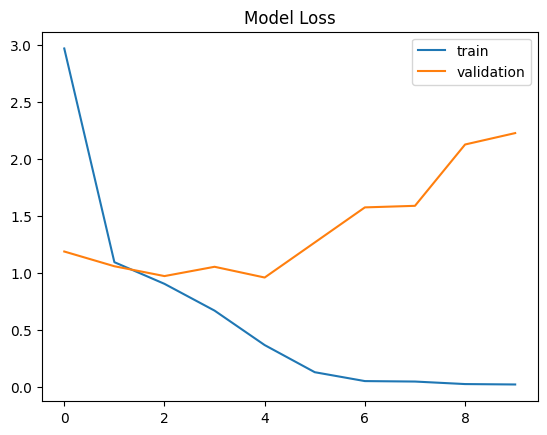

In [ ]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

Try with the Epoch of 6

In [ ]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 126, 126, 64)   │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 126, 126, 64)   │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1016064)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │   130,056,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,066,948 (496.17 MB)

 Trainable params: 130,066,948 (496.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
epoch=6


In [ ]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=epoch,verbose=1,validation_data=(X_test,y_test))


Epoch 1/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.3013 - loss: 8.3763 - val_accuracy: 0.2566 - val_loss: 1.3373
Epoch 2/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.4181 - loss: 1.2339 - val_accuracy: 0.4934 - val_loss: 1.1514
Epoch 3/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5681 - loss: 1.0046 - val_accuracy: 0.5954 - val_loss: 1.0348
Epoch 4/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.6954 - loss: 0.7746 - val_accuracy: 0.5954 - val_loss: 1.1080
Epoch 5/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.8349 - loss: 0.4749 - val_accuracy: 0.5658 - val_loss: 1.1476
Epoch 6/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.8866 - loss: 0.2830 - val_accuracy: 0.5987 - val_loss: 1.3546


In [ ]:
prediction=model.predict(X_test)
type(prediction[0])

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step


numpy.ndarray

Here I make predictions

In [ ]:
tr_pred=model.predict(X_train)
y1=[] #training predictions
for i in tr_pred:
  y1.append(np.argmax(i))
ts_pred=model.predict(X_test)
y2=[] #testing predictions
for i in ts_pred:
  y2.append(np.argmax(i))

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step


In [ ]:
min(y1),max(y1)

(np.int64(0), np.int64(3))

In [ ]:
for i in range(len(y1)):
  y1[i]=decoder[y1[i]]
for i in range(len(y2)):
  y2[i]=decoder[y2[i]]

In [ ]:
y_train=y_train.reshape(1200)
y_test=y_test.reshape(304)

In [ ]:
y_1=[]
y_2=[]
for i in range(len(y_train)):
  y_1.append(decoder[y_train[i]])
for i in range(len(y_test)):
  y_2.append(decoder[y_test[i]])

Confusion matrix for the training data

(<Figure size 500x500 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

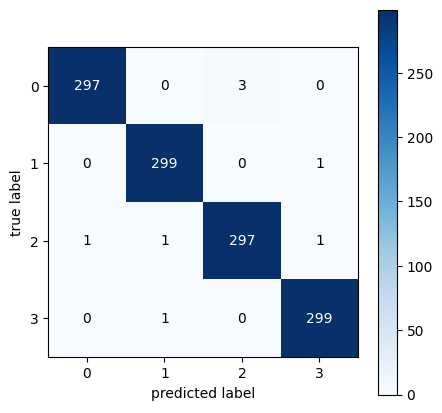

In [ ]:
train_mat=confusion_matrix(y_1,y1)
plot_confusion_matrix(train_mat,figsize=(5,5),colorbar=True)

Confusion matrix for the testing data

(<Figure size 500x500 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

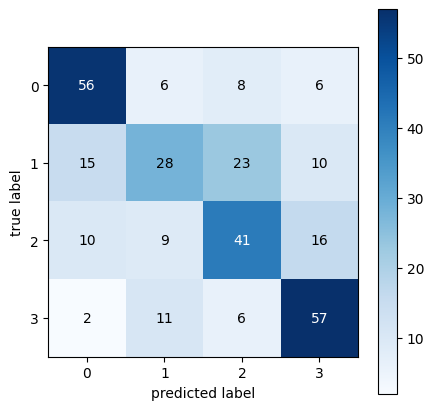

In [ ]:
test_mat=confusion_matrix(y_2,y2)
plot_confusion_matrix(test_mat,figsize=(5,5),colorbar=True)

Output the number of correct and incorrect guesses, along with the examples of 3 correct and 3 incorrect predictions.

Total correct predictions: 182
Total incorrect predictions: 122
Success rate: 0.5986842105263158


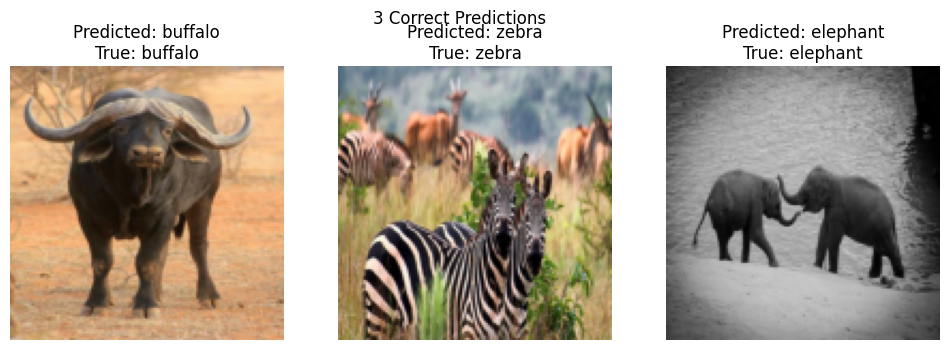

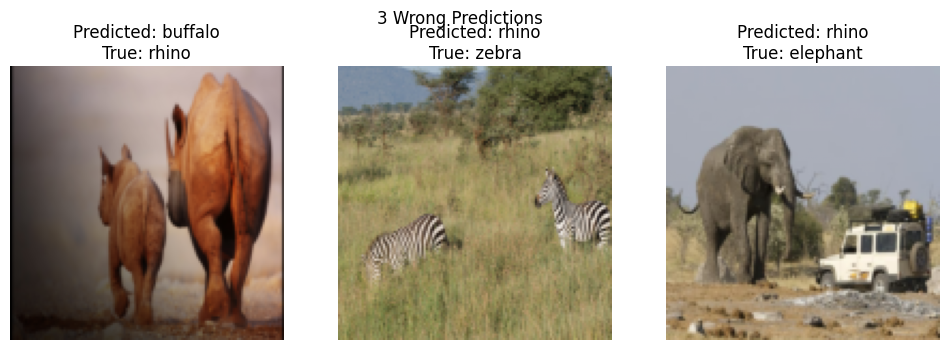

In [ ]:
# Find correct and incorrect indices
correct_indices = []
incorrect_indices = []

for i in range(len(y_2)):
    if y_2[i] == y2[i]:
        correct_indices.append(i)
    else:
        incorrect_indices.append(i)

print(f"Total correct predictions: {len(correct_indices)}")
print(f"Total incorrect predictions: {len(incorrect_indices)}")
print(f"Success rate: {len(correct_indices)/(len(correct_indices) + len(incorrect_indices))}")

# Function to plot images
def plot_examples(indices, title):
    plt.figure(figsize=(12,4))
    for i, idx in enumerate(indices[:3]):
        plt.subplot(1, 3, i+1)
        plt.imshow(X_test[idx])
        plt.title(f"Predicted: {y2[idx]}\nTrue: {y_2[idx]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Show 3 correct predictions
plot_examples(correct_indices, "3 Correct Predictions")

# Show 3 incorrect predictions
plot_examples(incorrect_indices, "3 Wrong Predictions")
